In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os


warnings.filterwarnings('ignore')
os.environ['KMP_DUPLICATE_LIB_OK']='True' # to prevent kernel from terminating
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
single_image = X_train[0]

In [6]:
single_image.shape

(28, 28)

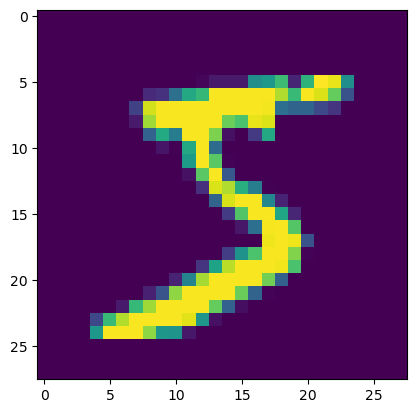

In [7]:
plt.imshow(single_image)

In [8]:
## One hot encoding

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
y_example = to_categorical(y_train)

In [13]:
y_example.shape


(60000, 10)

In [14]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [15]:
y_cat_train = to_categorical(y_train,10)

In [16]:
# normalizing data in order not to run into Gradident problems 

In [17]:
# Since we know that the images have 0-255 we can make assumptions that future images have constructions of 0 -255
# this are the ranges of the image

In [18]:
X_train = X_train/255
X_test = X_test/255

In [19]:
scaled_image = X_train[0]

In [20]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [21]:
scaled_image.max()

1.0

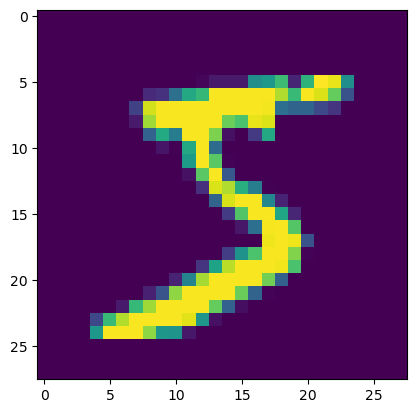

In [22]:
plt.imshow(scaled_image)

In [23]:
# Reshape the data

In [24]:
X_train.shape

(60000, 28, 28)

In [25]:
# batch_size,width,height,color_channels
X_train = X_train.reshape(60000,28,28,1)

In [26]:
X_test.shape

(10000, 28, 28)

In [27]:
X_test = X_test.reshape(10000,28,28,1)

# model Creation and Training

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [30]:
model = Sequential()
# Convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),
                input_shape=(28,28,1),activation='relu'))
# Padding layer
model.add(MaxPool2D(pool_size=(2,2)))
# Flatten the images
model.add(Flatten())
# Adding Dense Layers
model.add(Dense(128,activation='relu'))
#Output layer Softmax -> since its a multiclass problem
model.add(Dense(10,activation='softmax'))
# compile
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [32]:
## Adding an early stopping call back 

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [35]:
model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 40s 19ms/step - loss: 0.1321 - accuracy: 0.9605 - val_loss: 0.0532 - val_accuracy: 0.9832
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0450 - accuracy: 0.9859 - val_loss: 0.0463 - val_accuracy: 0.9863
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0299 - accuracy: 0.9901 - val_loss: 0.0360 - val_accuracy: 0.9887
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0193 - accuracy: 0.9939 - val_loss: 0.0344 - val_accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0138 - accuracy: 0.9957 - val_loss: 0.0393 - val_accuracy: 0.9883


In [38]:
metrics = pd.DataFrame(model.history.history)

In [39]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.132059,0.960467,0.053166,0.9832
1,0.045039,0.985900,0.046273,0.9863
2,0.029872,0.990150,0.036009,0.9887
3,0.019275,0.993933,0.034387,0.9889
4,0.013782,0.995683,0.039296,0.9883


<Axes: >

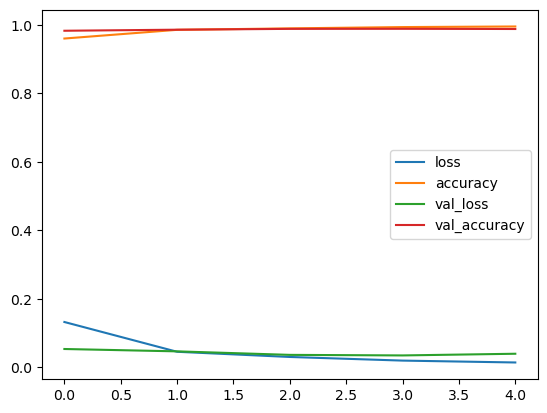

In [40]:
metrics.plot()

<Axes: >

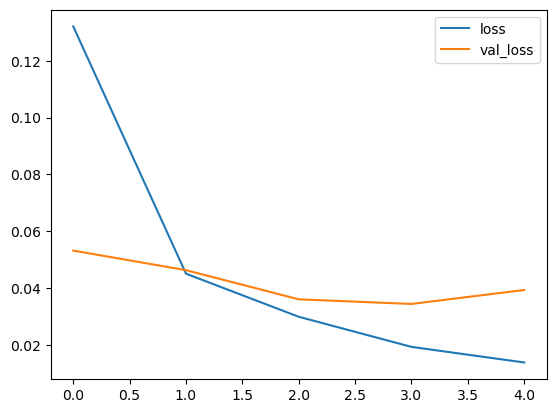

In [41]:
metrics[['loss','val_loss']].plot()

<Axes: >

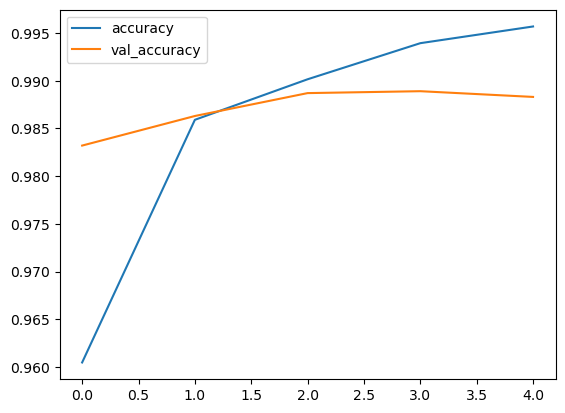

In [42]:
metrics[['accuracy','val_accuracy']].plot()

In [43]:
# Classification report and confusion matrix

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
y_cat_test.shape

(10000, 10)

In [53]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [58]:
predictions =  model.predict(X_test).argmax(axis=-1)

313/313 [==============================] - 2s 5ms/step


In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.96      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [60]:
print(confusion_matrix(y_test,predictions))

[[ 977    0    0    0    0    0    0    0    0    3]
 [   0 1133    0    0    0    0    2    0    0    0]
 [   0    1 1022    1    0    0    0    6    0    2]
 [   0    0    2 1003    0    3    0    0    1    1]
 [   0    0    0    0  969    0    0    0    2   11]
 [   2    0    0    6    0  880    1    0    0    3]
 [   4    3    0    1    4    3  940    0    3    0]
 [   1    0    4    1    0    0    0 1009    1   12]
 [   6    1    2    0    0    4    0    3  947   11]
 [   0    1    0    0    3    0    0    1    1 1003]]


In [61]:
## Visualize the matrix use

In [66]:
#sns.heatmap(print(confusion_matrix(y_test,predictions)))